In [14]:
import os
import pickle

import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [15]:
def get_metrics(results):

    metrics_dict = {}

    for seed in results.keys():

        result_seed = results[seed]
        cpe_weights = list(result_seed.keys())
        # cpe_weights.remove("setting")

        _, n_post_samples = result_seed[cpe_weights[0]][0].shape

        metrics_dict[seed] = {}

        metrics_dict[seed]["nll_gibbs_train"] = []
        metrics_dict[seed]["nll_gibbs_test"] = []
        metrics_dict[seed]["nll_bayes_train"] = []
        metrics_dict[seed]["nll_bayes_test"] = []

        metrics_dict[seed]["err_gibbs_train"] = []
        metrics_dict[seed]["err_gibbs_test"] = []
        metrics_dict[seed]["err_bayes_train"] = []
        metrics_dict[seed]["err_bayes_test"] = []

        # metrics_dict[seed]["grad_nll_gibbs"]=[]

        for cpe_weight in cpe_weights:

            log_p_train = torch.tensor(result_seed[cpe_weight][0])
            log_p_test = torch.tensor(result_seed[cpe_weight][1])

            metrics_dict[seed]["nll_gibbs_train"].append(-log_p_train.mean().item())
            metrics_dict[seed]["nll_gibbs_test"].append(-log_p_test.mean().item())

            bayes_loss_train = (
                (
                    torch.log(torch.tensor(n_post_samples))
                    - torch.logsumexp(log_p_train, 1)
                )
                .mean()
                .item()
            )
            metrics_dict[seed]["nll_bayes_train"].append(bayes_loss_train)
            bayes_loss_test = (
                (
                    torch.log(torch.tensor(n_post_samples))
                    - torch.logsumexp(log_p_test, 1)
                )
                .mean()
                .item()
            )
            metrics_dict[seed]["nll_bayes_test"].append(bayes_loss_test)

            # grad_expected_gibbs = (
            #         -n_train
            #         * (
            #             (log_p_train.mean(0) * log_p_test.mean(0)).mean()
            #             - log_p_test.mean() * log_p_train.mean()
            #         ).item()
            #     )
            # metrics_dict[seed]["grad_nll_gibbs"].append(grad_expected_gibbs)

            metrics_dict[seed]["err_gibbs_train"].append(
                1 - np.array(result_seed[cpe_weight][2])[:, 1].mean()
            )
            metrics_dict[seed]["err_gibbs_test"].append(
                1 - np.array(result_seed[cpe_weight][3])[:, 1].mean()
            )
            metrics_dict[seed]["err_bayes_train"].append(
                1 - np.array(result_seed[cpe_weight][4])[:, 1].mean()
            )
            metrics_dict[seed]["err_bayes_test"].append(
                1 - np.array(result_seed[cpe_weight][5])[:, 1].mean()
            )

    return metrics_dict


# main plots

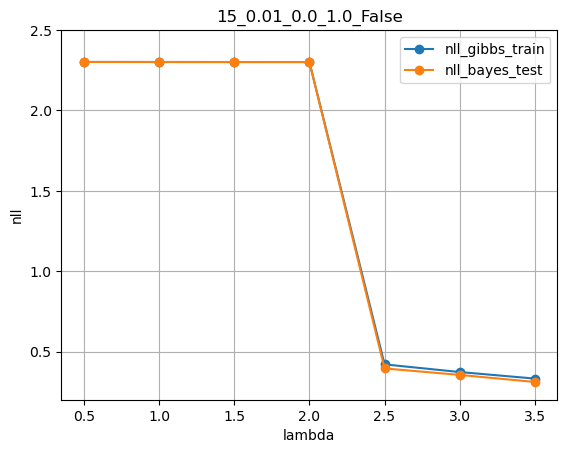

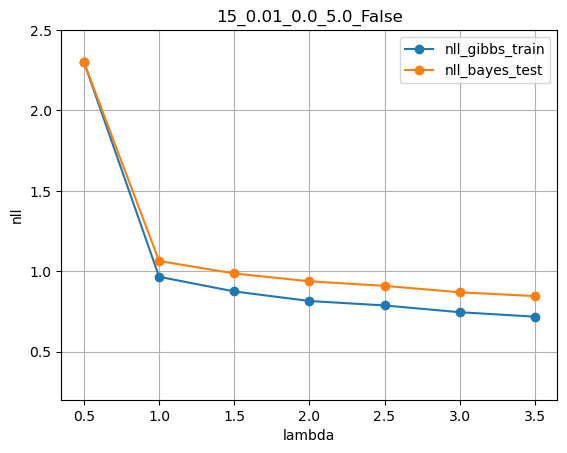

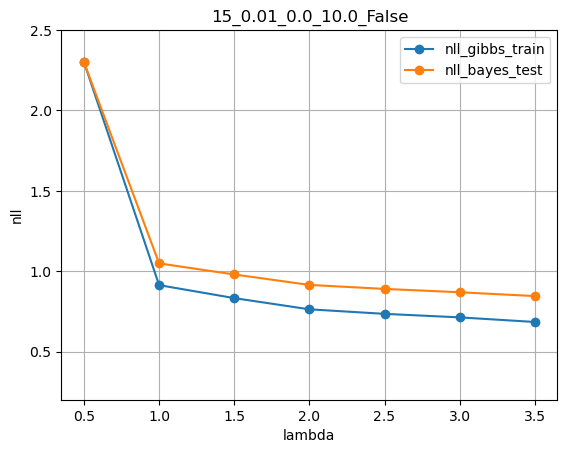

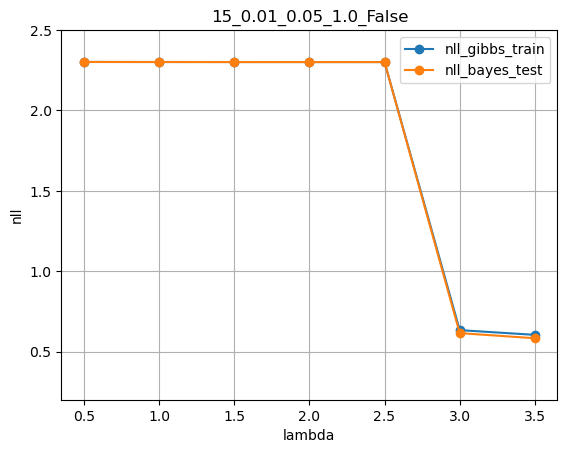

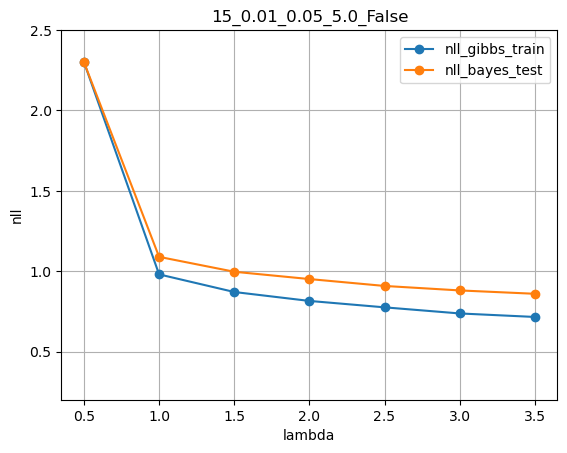

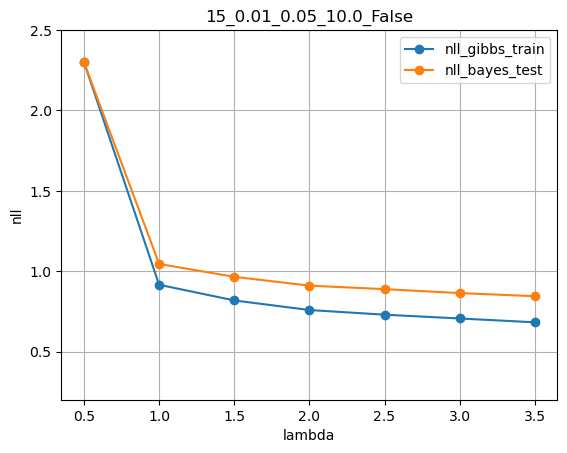

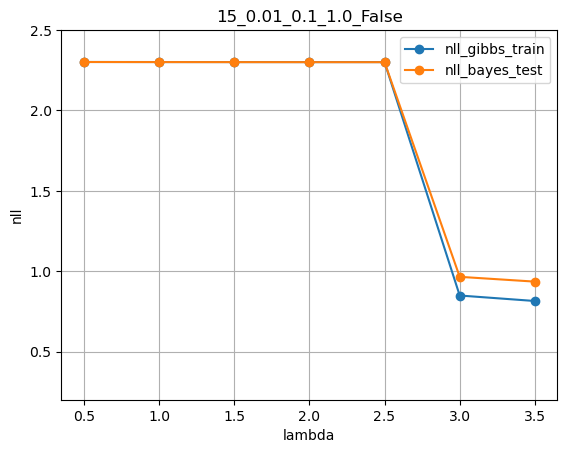

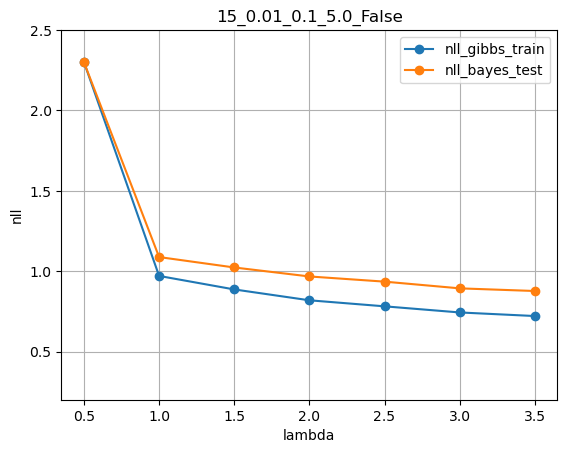

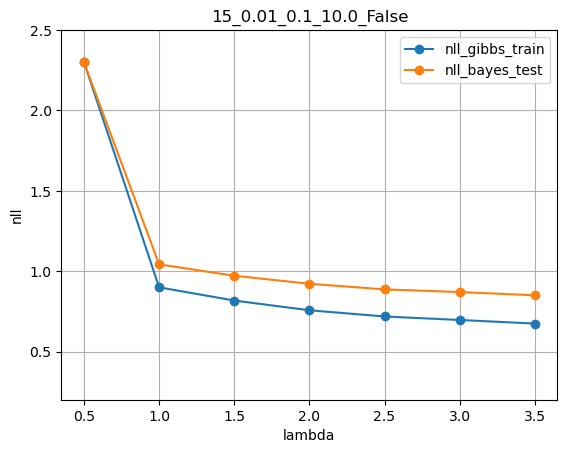

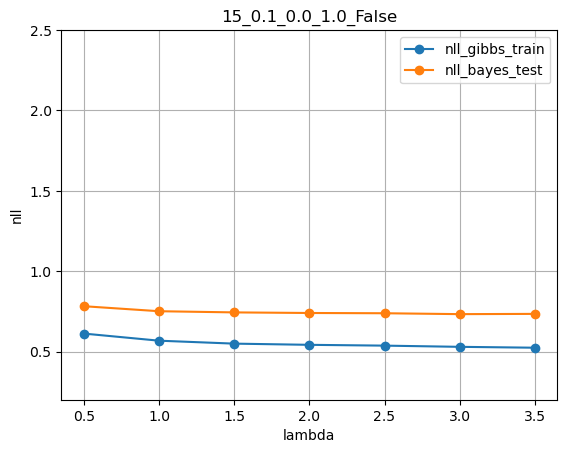

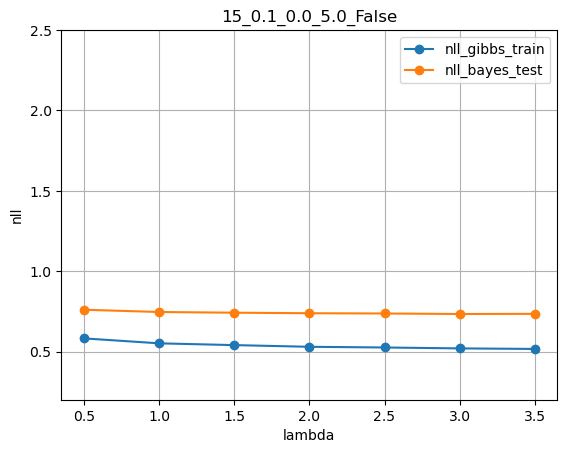

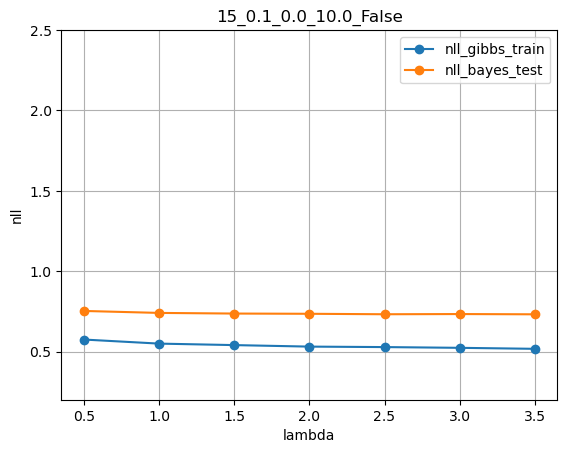

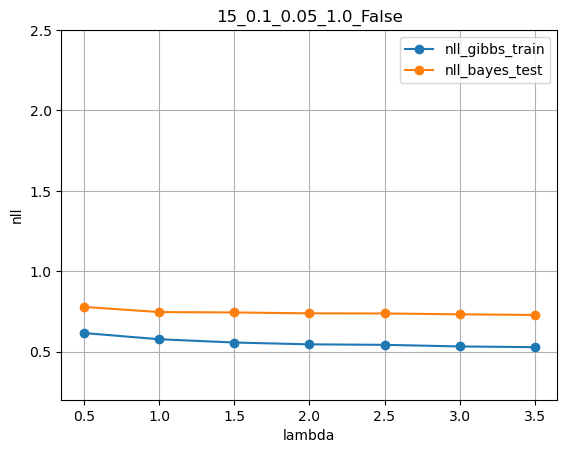

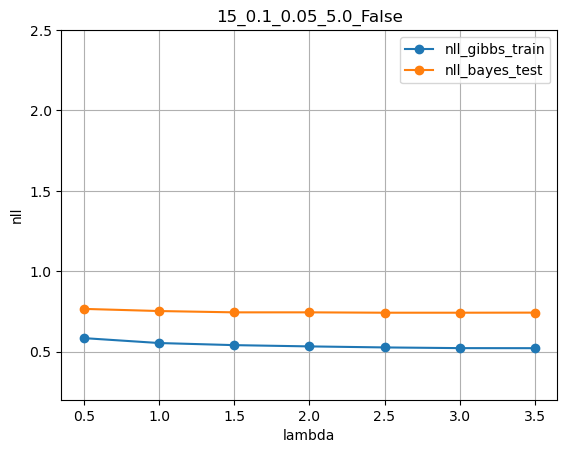

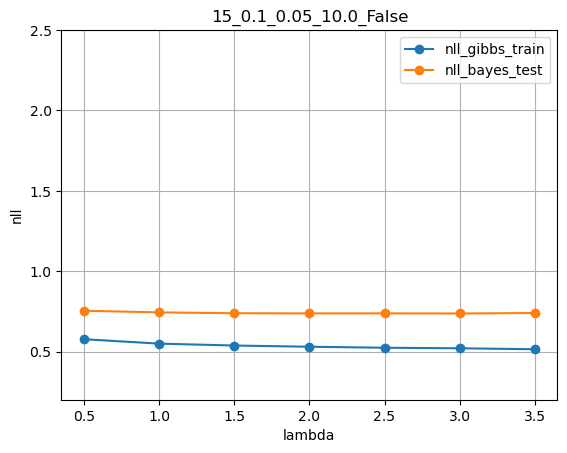

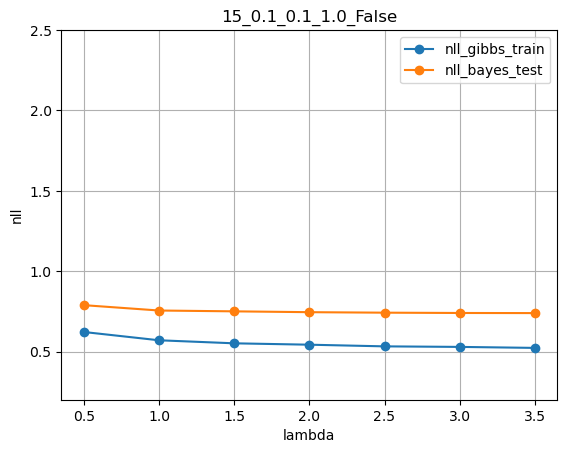

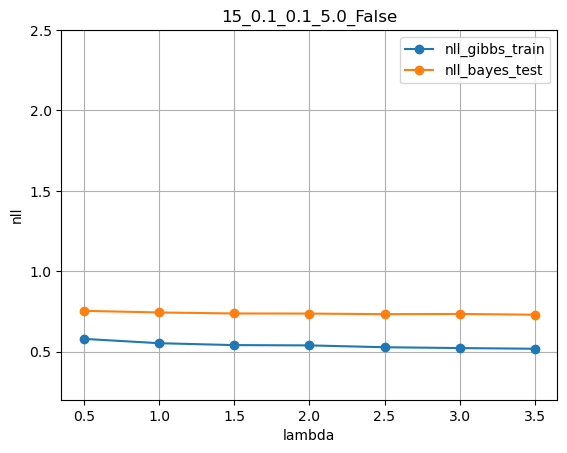

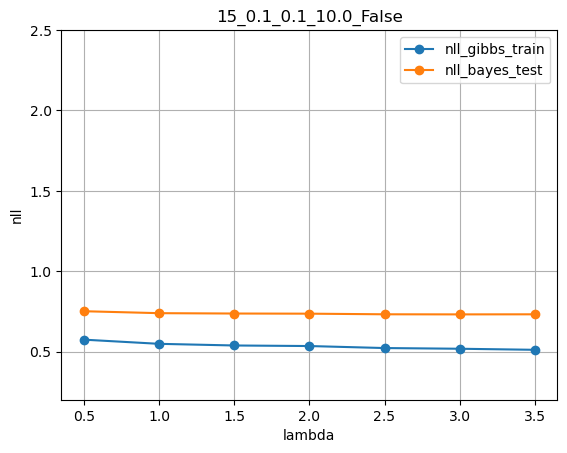

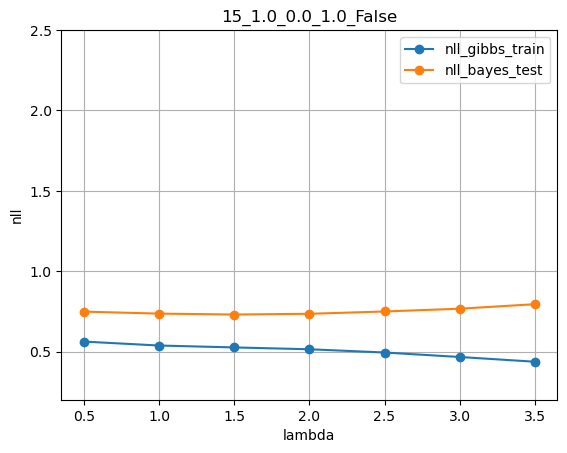

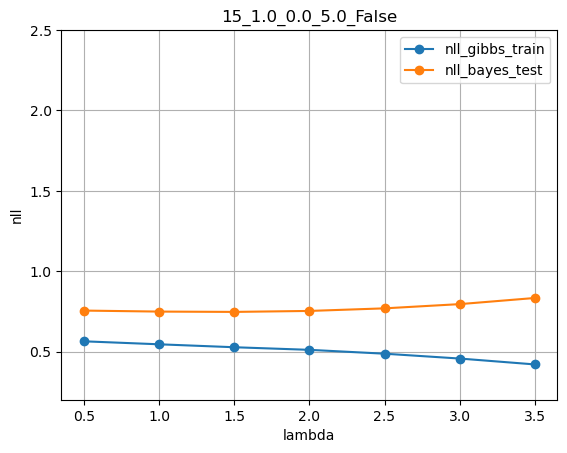

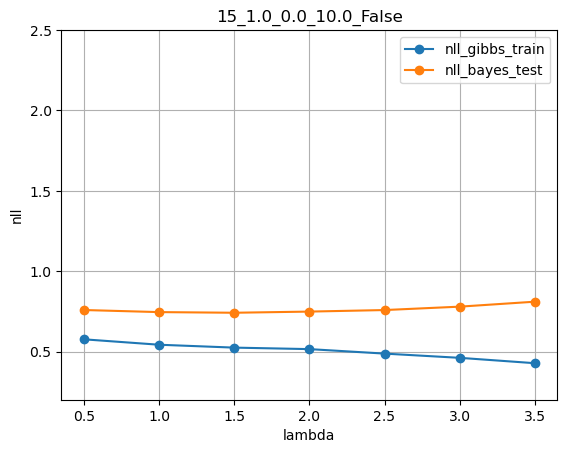

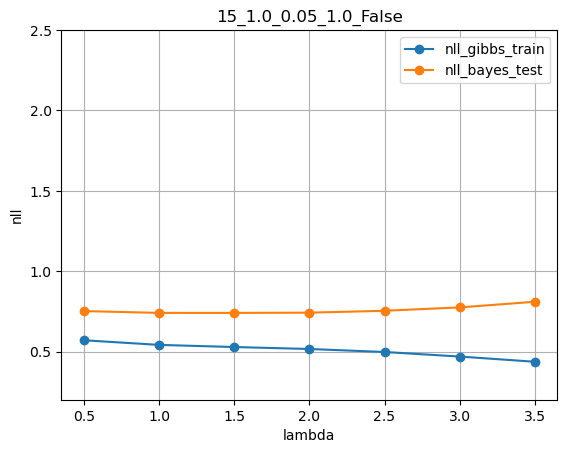

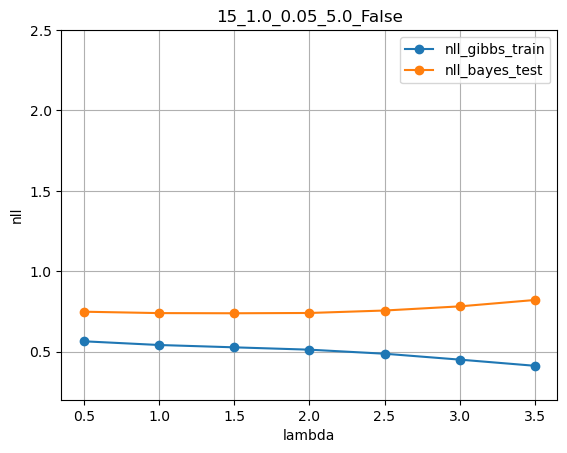

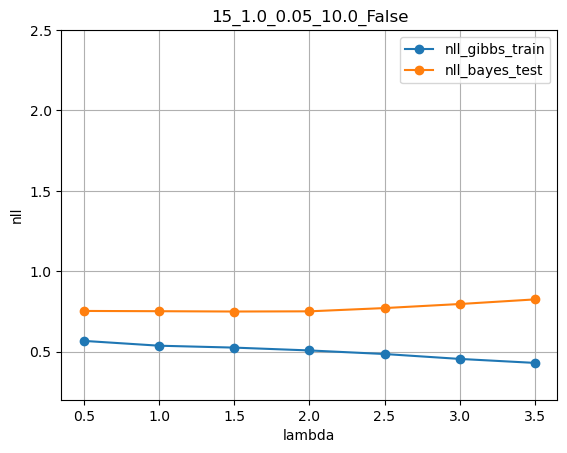

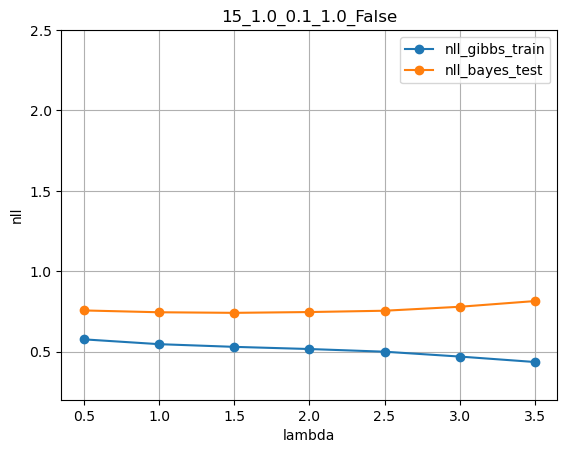

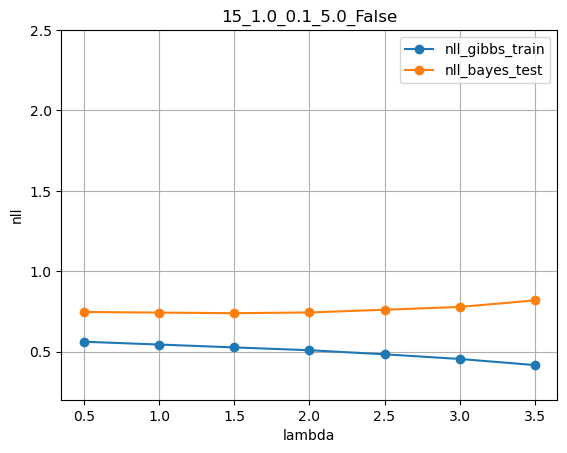

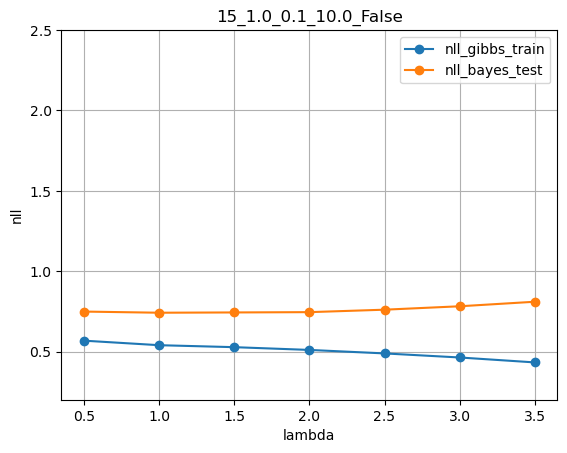

In [75]:
prior_scales = [0.01, 0.1, 1.0]
label_noises = [0.0,0.05, 0.1]
gammas = [1.0, 5.0, 10.0]
if_das = [False]
meta_setting_i = "batchsize_100_epoch_100"
name_metrics = ["nll"]

# all_metrics = {}
for prior_scale in prior_scales:
    for label_noise in label_noises:
        for gamma in gammas:
            for if_da in if_das:

                setting_i = f"prior_scale_{prior_scale}_label_noise_{label_noise}_smooth_softmax_{gamma}_data_augmentation_{if_da}"

                with open(
                    f"./results_{meta_setting_i}/{setting_i}.pickle", "rb"
                ) as handle:
                    results = pickle.load(handle)
                metrics = get_metrics(results)
                seeds = list(results.keys())
                cpe_weights = list(results[seeds[0]].keys())
                # cpe_weights.remove("setting")

                # all_metrics[prior_scale] = metrics

                dir_prefix = f"./main/{meta_setting_i}/"
                if not os.path.exists(dir_prefix):
                    os.makedirs(dir_prefix)

                
                for metric in name_metrics:
                    for seed in seeds:
                        save_name = f"{metric}_{seed}_{setting_i}"
                        plt.title(f"{seed}_{prior_scale}_{label_noise}_{gamma}_{if_da}")
                        plt.grid()
                        plt.plot(
                            np.arange(0, len(cpe_weights), 1),
                            metrics[seed][f"{metric}_gibbs_train"],
                            marker="o",
                            label=f"{metric}_gibbs_train",
                        )
                        plt.plot(
                            np.arange(0, len(cpe_weights), 1),
                            metrics[seed][f"{metric}_bayes_test"],
                            marker="o",
                            label=f"{metric}_bayes_test",
                        )
                        # plt.xticks(np.arange(0,len(cpe_weights),1), np.log10(cpe_weights))
                        plt.xticks(np.arange(0, len(cpe_weights), 1), cpe_weights)
                        plt.xlabel("lambda")
                        plt.ylabel(f"{metric}")
                        plt.ylim(0.2,2.5)
                        plt.legend()
                        # plt.savefig(f"{dir_prefix}/{save_name}.png", dpi=300)
                        plt.show()


In [6]:
name_metric = "err_bayes_test"
name_seed = 24
df = pd.DataFrame()
for prior_scale in [0.01, 0.1, 1.0]:
    this_df = pd.DataFrame.from_dict(all_metrics_priors[prior_scale][name_seed])[
        name_metric
    ]
    this_df.rename(prior_scale, inplace=True)
    df = pd.concat([df, this_df], axis=1)
df.index = list(np.linspace(0.5, 3.5, 7))


In [7]:
df


,0.01,0.10,1.00
0.5,0.8865,0.0171,0.0141
1.0,0.1249,0.0125,0.0112
1.5,0.0737,0.0103,0.0096
2.0,0.0556,0.0096,0.0089
2.5,0.0508,0.0083,0.0087
3.0,0.0436,0.0089,0.0090
3.5,0.0412,0.0076,0.0066


# Joint Plots


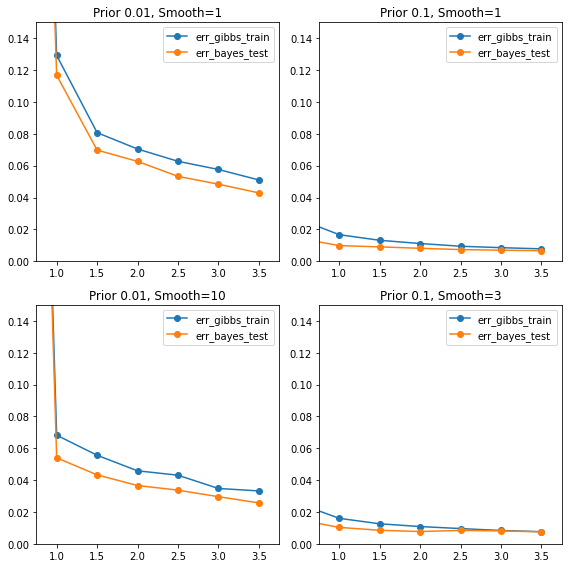

In [34]:
import matplotlib.pyplot as plt
import numpy as np

seed = 15
train_loss = "err_gibbs_train"
test_loss = "err_bayes_test"
y_lim = [0, 0.15]
x_lim = [0.75, 3.75]
# generate some random data
x = np.linspace(0, 2 * np.pi, 100)
y1 = np.sin(x)
y2 = np.cos(x)
y3 = np.tan(x)
y4 = np.exp(x)

# create a 2x2 grid of subplots with larger subplots and spacing
fig, axs = plt.subplots(2, 2, figsize=(8, 8))

prior = 0.01

# plot the data on each subplot and set the limits
axs[0, 0].plot(
    cpe_weights,
    all_metrics_priors[prior][seed][train_loss],
    marker="o",
    label=train_loss,
)
axs[0, 0].plot(
    cpe_weights, all_metrics_priors[prior][seed][test_loss], marker="o", label=test_loss
)
axs[0, 0].set_xlim(x_lim)
axs[0, 0].set_ylim(y_lim)
axs[0, 0].set_title("Prior 0.01, Smooth=1")
axs[0, 0].legend()


prior = 0.1
axs[0, 1].plot(
    cpe_weights,
    all_metrics_priors[prior][seed][train_loss],
    marker="o",
    label=train_loss,
)
axs[0, 1].plot(
    cpe_weights, all_metrics_priors[prior][seed][test_loss], marker="o", label=test_loss
)
axs[0, 1].set_xlim(x_lim)
axs[0, 1].set_ylim(y_lim)
axs[0, 1].set_title("Prior 0.1, Smooth=1")
axs[0, 1].legend()


gamma = 10.0
axs[1, 0].plot(
    cpe_weights,
    all_metrics_softmax[gamma][seed][train_loss],
    marker="o",
    label=train_loss,
)
axs[1, 0].plot(
    cpe_weights,
    all_metrics_softmax[gamma][seed][test_loss],
    marker="o",
    label=test_loss,
)
axs[1, 0].set_xlim(x_lim)
axs[1, 0].set_ylim(y_lim)
axs[1, 0].set_title("Prior 0.01, Smooth=10")
axs[1, 0].legend()


gamma = 3.0
axs[1, 1].plot(
    cpe_weights,
    all_metrics_softmax_prior[gamma][seed][train_loss],
    marker="o",
    label=train_loss,
)
axs[1, 1].plot(
    cpe_weights,
    all_metrics_softmax_prior[gamma][seed][test_loss],
    marker="o",
    label=test_loss,
)
axs[1, 1].set_xlim(x_lim)
axs[1, 1].set_ylim(y_lim)
axs[1, 1].set_title("Prior 0.1, Smooth=3")
axs[1, 1].legend()


# adjust the spacing between subplots
fig.tight_layout()

# show the plot
plt.show()


# Label Noise

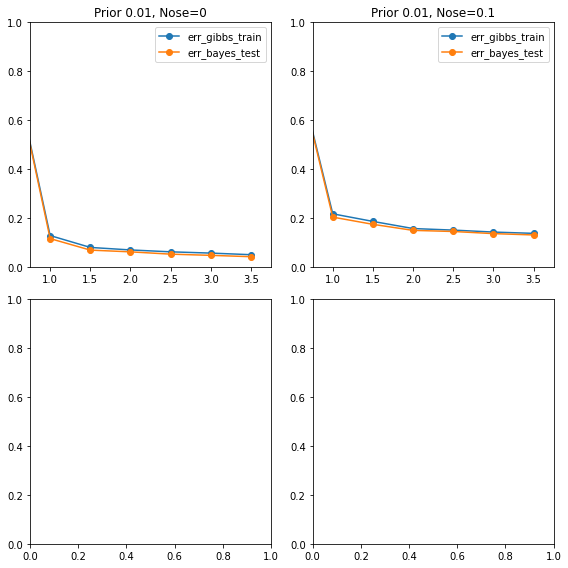

In [47]:
import matplotlib.pyplot as plt
import numpy as np

seed = 15
train_loss = "err_gibbs_train"
test_loss = "err_bayes_test"
y_lim = [0, 1.0]
x_lim = [0.75, 3.75]
# generate some random data
x = np.linspace(0, 2 * np.pi, 100)
y1 = np.sin(x)
y2 = np.cos(x)
y3 = np.tan(x)
y4 = np.exp(x)

# create a 2x2 grid of subplots with larger subplots and spacing
fig, axs = plt.subplots(2, 2, figsize=(8, 8))

prior = 0.01

# plot the data on each subplot and set the limits
axs[0, 0].plot(
    cpe_weights,
    all_metrics_priors[prior][seed][train_loss],
    marker="o",
    label=train_loss,
)
axs[0, 0].plot(
    cpe_weights, all_metrics_priors[prior][seed][test_loss], marker="o", label=test_loss
)
axs[0, 0].set_xlim(x_lim)
axs[0, 0].set_ylim(y_lim)
axs[0, 0].set_title("Prior 0.01, Nose=0")
axs[0, 0].legend()


noise = 0.1
axs[0, 1].plot(
    cpe_weights,
    all_metrics_noise[noise][seed][train_loss],
    marker="o",
    label=train_loss,
)
axs[0, 1].plot(
    cpe_weights, all_metrics_noise[noise][seed][test_loss], marker="o", label=test_loss
)
axs[0, 1].set_xlim(x_lim)
axs[0, 1].set_ylim(y_lim)
axs[0, 1].set_title("Prior 0.01, Nose=0.1")
axs[0, 1].legend()


# adjust the spacing between subplots
fig.tight_layout()

# show the plot
plt.show()


# between seeds

In [ ]:
# dir_prefix = f"./between seeds/{setting_i}/"
# if not os.path.exists(dir_prefix):
#     os.makedirs(dir_prefix)

# name_metrics=list(metrics[seeds[0]].keys())
# for name_metric in name_metrics:
#     save_name=f"{name_metric}"
#     plt.figure()
#     plt.title(save_name)
#     for seed in seeds:
#         plt.plot(np.arange(0,len(cpe_weights),1),metrics[seed][name_metric], marker="o", label=f"{seed}")

#     plt.xticks(np.arange(0,len(cpe_weights),1), np.log10(cpe_weights))
#     plt.legend()
#     plt.xlabel("lambda, log scale")
#     plt.ylabel(name_metric)
#     plt.ylim(0,0.1)
#     # plt.savefig(f"./{dir_prefix}/{save_name}.png", dpi=300)
#     plt.show()
